In [1]:
import torch
import math

In [35]:
h = 0.1
k = 0.1
x = torch.arange(-1,1+h,h)
t = torch.arange(0,2+k,k)

In [3]:
X = torch.stack(torch.meshgrid(x,t)).reshape(2,-1)

/home/sajid/miniconda3/envs/myenvi/lib/python3.12/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [38]:
T

tensor([[0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
         1.8000, 1.9000, 2.0000],
        [0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
         1.8000, 1.9000, 2.0000],
        [0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
         1.8000, 1.9000, 2.0000],
        [0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
         1.8000, 1.9000, 2.0000],
        [0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
         1.8000, 1.9000, 2.0000],
        [0.0000, 0.1

In [36]:
X,T=torch.meshgrid(x,t)

In [4]:
X.shape

torch.Size([2, 441])

In [37]:
X

tensor([[-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00],
        [-9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01,
         -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01,
         -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01,
         -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01,
         -9.0000e-01],
        [-8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01,
         -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01,
         -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01,
         -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01,
         -8.0000e-01],
        [-7.0000e-01, -7.0000e-01, -7.0000e

In [6]:
x[0]

tensor(-1.)

In [7]:
bc1 = torch.stack(torch.meshgrid(x[0],t)).reshape(2,-1)

In [8]:
bc1

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [ 0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
          0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
          1.6000,  1.7000,  1.8000,  1.9000,  2.0000]])

In [9]:
bc2 = torch.stack(torch.meshgrid(x[-1],t)).reshape(2,-1)

In [10]:
bc2

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000],
        [0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
         1.8000, 1.9000, 2.0000]])

In [11]:
ic = torch.stack(torch.meshgrid(x,t[0])).reshape(2,-1)

In [12]:
ic

tensor([[-1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
         -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
         -2.9802e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
          5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
          1.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00]])

In [13]:
X_train = torch.cat([bc1,bc2,ic],0)

In [14]:
X_train

tensor([[-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00],
        [ 0.0000e+00,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
          5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
          1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
          1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
          2.0000e+00],
        [ 1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
          1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
          1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
          1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
          1.0000e+00],
        [ 0.0000e+00,  1.0000e-01,  2.0000e

In [15]:
len(bc1)

2

In [18]:
y_bc1 = torch.zeros(len(bc1))
y_bc2 = torch.zeros(len(bc2))

In [20]:
y_ic = -torch.sin(math.pi*ic[:,0])

In [21]:
y_ic

tensor([-8.7423e-08, -0.0000e+00])

In [22]:
y_train = torch.cat([y_bc1,y_bc2,y_ic])

In [23]:
y_train

tensor([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -8.7423e-08,
        -0.0000e+00])

In [2]:
import numpy as np
t = np.array([1,2,3])
x = np.array([4,5])
v = np.array([6,7,8,9])
T,X,V = np.meshgrid(t,x,v)

In [4]:
T

array([[[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]],

       [[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]]])

In [4]:
X

array([[[4, 4, 4, 4],
        [4, 4, 4, 4],
        [4, 4, 4, 4]],

       [[5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5]]])

In [5]:
V

array([[[6, 7, 8, 9],
        [6, 7, 8, 9],
        [6, 7, 8, 9]],

       [[6, 7, 8, 9],
        [6, 7, 8, 9],
        [6, 7, 8, 9]]])

In [30]:
t = np.linspace(0,1,2)
x = np.linspace(-1,1,4)
v = np.linspace(-1,1,5)
T,X,V = np.meshgrid(t,x,v)


In [31]:
T

array([[[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.]],

       [[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.]],

       [[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.]],

       [[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.]]])

In [7]:
X

array([[[-1.        , -1.        , -1.        , -1.        ,
         -1.        ],
        [-1.        , -1.        , -1.        , -1.        ,
         -1.        ]],

       [[-0.33333333, -0.33333333, -0.33333333, -0.33333333,
         -0.33333333],
        [-0.33333333, -0.33333333, -0.33333333, -0.33333333,
         -0.33333333]],

       [[ 0.33333333,  0.33333333,  0.33333333,  0.33333333,
          0.33333333],
        [ 0.33333333,  0.33333333,  0.33333333,  0.33333333,
          0.33333333]],

       [[ 1.        ,  1.        ,  1.        ,  1.        ,
          1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,
          1.        ]]])

In [8]:
V

array([[[-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ]],

       [[-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ]],

       [[-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ]],

       [[-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ]]])

In [23]:
x = np.arange(0,6)
print("x length: ",len(x))
y = np.arange(0,5)
print("y length : ",len(y))
X,Y = np.meshgrid(x,y)

x length:  6
y length :  5


In [18]:
X

array([[0, 1, 2, 3, 4, 5],
       [0, 1, 2, 3, 4, 5],
       [0, 1, 2, 3, 4, 5],
       [0, 1, 2, 3, 4, 5],
       [0, 1, 2, 3, 4, 5]])

In [19]:
Y

array([[0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4]])

In [24]:
z = np.arange(0,7)
print("z length: ",len(z))
X,Y,Z = np.meshgrid(x,y,z)

z length:  7


In [25]:
X

array([[[0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5]],

       [[0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5]],

       [[0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5]],

       [[0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5]],

       [[0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5]]])

In [26]:
X.shape

(5, 6, 7)

In [27]:
Y

array([[[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2]],

       [[3, 3, 3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3, 3, 3]],

       [[4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4]]])

In [28]:
Y.shape

(5, 6, 7)

In [29]:
Z

array([[[0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6]],

       [[0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6]],

       [[0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6]],

       [[0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6]],

       [[0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6]]])

In [113]:
import math
v_max = 3.5
t_max = 1
alpha = 0.2
pi = math.pi
x_max = pi
N_pred = 150
N_init = 150
x = np.linspace(-x_max,x_max,N_pred)
t = np.linspace(0,t_max,N_pred)
print(t[1])
v = np.linspace(-v_max,v_max,N_pred)
T,X,V = np.meshgrid(t,x,v)


0.006711409395973154


In [37]:
T.shape

(151, 152, 153)

In [56]:
t

array([0.        , 0.00671141, 0.01342282, 0.02013423, 0.02684564,
       0.03355705, 0.04026846, 0.04697987, 0.05369128, 0.06040268,
       0.06711409, 0.0738255 , 0.08053691, 0.08724832, 0.09395973,
       0.10067114, 0.10738255, 0.11409396, 0.12080537, 0.12751678,
       0.13422819, 0.1409396 , 0.14765101, 0.15436242, 0.16107383,
       0.16778523, 0.17449664, 0.18120805, 0.18791946, 0.19463087,
       0.20134228, 0.20805369, 0.2147651 , 0.22147651, 0.22818792,
       0.23489933, 0.24161074, 0.24832215, 0.25503356, 0.26174497,
       0.26845638, 0.27516779, 0.28187919, 0.2885906 , 0.29530201,
       0.30201342, 0.30872483, 0.31543624, 0.32214765, 0.32885906,
       0.33557047, 0.34228188, 0.34899329, 0.3557047 , 0.36241611,
       0.36912752, 0.37583893, 0.38255034, 0.38926174, 0.39597315,
       0.40268456, 0.40939597, 0.41610738, 0.42281879, 0.4295302 ,
       0.43624161, 0.44295302, 0.44966443, 0.45637584, 0.46308725,
       0.46979866, 0.47651007, 0.48322148, 0.48993289, 0.49664

In [42]:
T[0] == T[1]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [59]:
150*150

22500

In [54]:
T_d = T.flatten()

In [60]:
T_d[22500:22651]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [45]:
X.shape

(150, 150, 150)

In [46]:
X[0]

array([[-3.14159265, -3.14159265, -3.14159265, ..., -3.14159265,
        -3.14159265, -3.14159265],
       [-3.14159265, -3.14159265, -3.14159265, ..., -3.14159265,
        -3.14159265, -3.14159265],
       [-3.14159265, -3.14159265, -3.14159265, ..., -3.14159265,
        -3.14159265, -3.14159265],
       ...,
       [-3.14159265, -3.14159265, -3.14159265, ..., -3.14159265,
        -3.14159265, -3.14159265],
       [-3.14159265, -3.14159265, -3.14159265, ..., -3.14159265,
        -3.14159265, -3.14159265],
       [-3.14159265, -3.14159265, -3.14159265, ..., -3.14159265,
        -3.14159265, -3.14159265]])

In [47]:
T[:,0,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
T[:,1,:]

array([[0.00671141, 0.00671141, 0.00671141, ..., 0.00671141, 0.00671141,
        0.00671141],
       [0.00671141, 0.00671141, 0.00671141, ..., 0.00671141, 0.00671141,
        0.00671141],
       [0.00671141, 0.00671141, 0.00671141, ..., 0.00671141, 0.00671141,
        0.00671141],
       ...,
       [0.00671141, 0.00671141, 0.00671141, ..., 0.00671141, 0.00671141,
        0.00671141],
       [0.00671141, 0.00671141, 0.00671141, ..., 0.00671141, 0.00671141,
        0.00671141],
       [0.00671141, 0.00671141, 0.00671141, ..., 0.00671141, 0.00671141,
        0.00671141]])

In [49]:
V[0]

array([[-3.5       , -3.45302013, -3.40604027, ...,  3.40604027,
         3.45302013,  3.5       ],
       [-3.5       , -3.45302013, -3.40604027, ...,  3.40604027,
         3.45302013,  3.5       ],
       [-3.5       , -3.45302013, -3.40604027, ...,  3.40604027,
         3.45302013,  3.5       ],
       ...,
       [-3.5       , -3.45302013, -3.40604027, ...,  3.40604027,
         3.45302013,  3.5       ],
       [-3.5       , -3.45302013, -3.40604027, ...,  3.40604027,
         3.45302013,  3.5       ],
       [-3.5       , -3.45302013, -3.40604027, ...,  3.40604027,
         3.45302013,  3.5       ]])

In [51]:
(T.flatten()).shape

(3375000,)

In [61]:
X_star = np.hstack((T.flatten()[:,None],X.flatten()[:,None],V.flatten()[:,None]))

In [63]:
X_star

array([[ 0.        , -3.14159265, -3.5       ],
       [ 0.        , -3.14159265, -3.45302013],
       [ 0.        , -3.14159265, -3.40604027],
       ...,
       [ 1.        ,  3.14159265,  3.40604027],
       [ 1.        ,  3.14159265,  3.45302013],
       [ 1.        ,  3.14159265,  3.5       ]])

In [64]:
lb = X_star.min(0)

In [65]:
lb

array([ 0.        , -3.14159265, -3.5       ])

In [66]:
ub = X_star.max(0)

In [67]:
ub

array([1.        , 3.14159265, 3.5       ])

In [102]:
xx2 = np.stack((T[0,:,:],X[0,:,:],V[0,:,:]),axis=2) # x=-pi condition

In [103]:
xx2

array([[[ 0.        , -3.14159265, -3.5       ],
        [ 0.        , -3.14159265, -3.45302013],
        [ 0.        , -3.14159265, -3.40604027],
        ...,
        [ 0.        , -3.14159265,  3.40604027],
        [ 0.        , -3.14159265,  3.45302013],
        [ 0.        , -3.14159265,  3.5       ]],

       [[ 0.00671141, -3.14159265, -3.5       ],
        [ 0.00671141, -3.14159265, -3.45302013],
        [ 0.00671141, -3.14159265, -3.40604027],
        ...,
        [ 0.00671141, -3.14159265,  3.40604027],
        [ 0.00671141, -3.14159265,  3.45302013],
        [ 0.00671141, -3.14159265,  3.5       ]],

       [[ 0.01342282, -3.14159265, -3.5       ],
        [ 0.01342282, -3.14159265, -3.45302013],
        [ 0.01342282, -3.14159265, -3.40604027],
        ...,
        [ 0.01342282, -3.14159265,  3.40604027],
        [ 0.01342282, -3.14159265,  3.45302013],
        [ 0.01342282, -3.14159265,  3.5       ]],

       ...,

       [[ 0.98657718, -3.14159265, -3.5       ],
        [ 0

In [104]:
xx2.shape

(150, 150, 3)

In [73]:
xx2[0]

array([[ 0.        , -3.14159265, -3.5       ],
       [ 0.        , -3.14159265, -3.45302013],
       [ 0.        , -3.14159265, -3.40604027],
       [ 0.        , -3.14159265, -3.3590604 ],
       [ 0.        , -3.14159265, -3.31208054],
       [ 0.        , -3.14159265, -3.26510067],
       [ 0.        , -3.14159265, -3.21812081],
       [ 0.        , -3.14159265, -3.17114094],
       [ 0.        , -3.14159265, -3.12416107],
       [ 0.        , -3.14159265, -3.07718121],
       [ 0.        , -3.14159265, -3.03020134],
       [ 0.        , -3.14159265, -2.98322148],
       [ 0.        , -3.14159265, -2.93624161],
       [ 0.        , -3.14159265, -2.88926174],
       [ 0.        , -3.14159265, -2.84228188],
       [ 0.        , -3.14159265, -2.79530201],
       [ 0.        , -3.14159265, -2.74832215],
       [ 0.        , -3.14159265, -2.70134228],
       [ 0.        , -3.14159265, -2.65436242],
       [ 0.        , -3.14159265, -2.60738255],
       [ 0.        , -3.14159265, -2.560

In [74]:
xx2[0].shape

(150, 3)

In [75]:
xx2.shape

(150, 150, 3)

In [105]:
xx2 = np.reshape(xx2,(N_pred**2,3))

In [77]:
xx2

array([[ 0.        , -3.14159265, -3.5       ],
       [ 0.        , -3.14159265, -3.45302013],
       [ 0.        , -3.14159265, -3.40604027],
       ...,
       [ 1.        , -3.14159265,  3.40604027],
       [ 1.        , -3.14159265,  3.45302013],
       [ 1.        , -3.14159265,  3.5       ]])

In [100]:
xx2[:,1]

array([-3.14159265, -3.14159265, -3.14159265, ..., -3.14159265,
       -3.14159265, -3.14159265])

In [106]:
xx3 = np.stack((T[-1,:,:],X[-1,:,:],V[-1,:,:]),axis=2)
xx3 = np.reshape(xx3,(N_pred**2,3))

In [107]:
xx4 = np.stack((T[:,:,0],X[:,:,0],V[:,:,0]),axis=2)

In [108]:
xx4 = np.reshape(xx4,(N_pred**2,3))

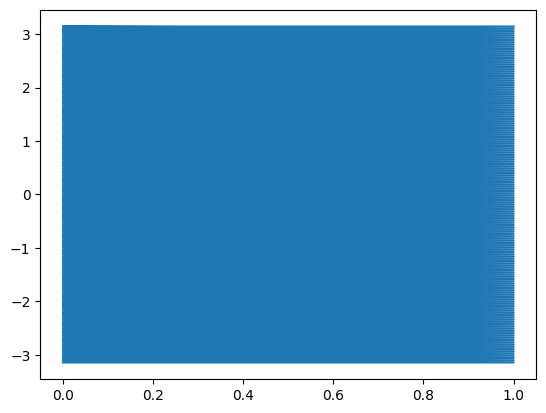

In [110]:
import matplotlib.pyplot as plt
plt.plot(xx4[:,0],xx4[:,1])
plt.show()

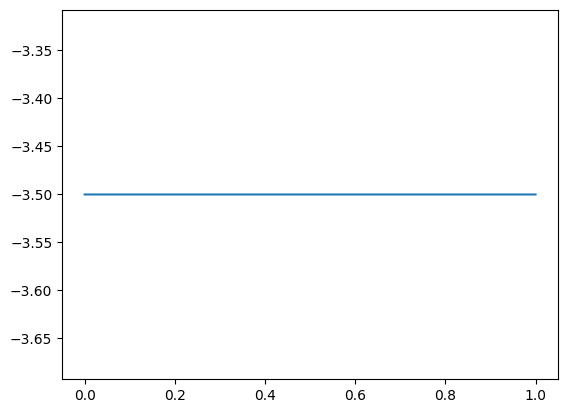

In [112]:
plt.plot(xx4[:,0],xx4[:,2])
plt.show()

In [117]:
xx1 = np.stack((np.zeros(N_init**2),np.linspace(-x_max,x_max,N_init**2),np.clip(np.squeeze(np.random.multivariate_normal([0.],[[2.]],N_init**2)),-v_max,v_max)),axis=1)

In [118]:
xx1.shape

(22500, 3)

In [ ]:
ff1 = initialConditions(xx1[:,1],xx1[:,2])

In [80]:
T[:,:,0]

array([[0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       ...,
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ],
       [0.        , 0.00671141, 0.01342282, ..., 0.98657718, 0.99328859,
        1.        ]])

In [81]:
x_d = np.array([[[1,2,3],
                 [4,5,6]],
                [[7,8,9],
                 [10,11,12]]])

In [82]:
x_d[:,:,0]

array([[ 1,  4],
       [ 7, 10]])

In [84]:
X[:,:,0]

array([[-3.14159265, -3.14159265, -3.14159265, ..., -3.14159265,
        -3.14159265, -3.14159265],
       [-3.09942362, -3.09942362, -3.09942362, ..., -3.09942362,
        -3.09942362, -3.09942362],
       [-3.0572546 , -3.0572546 , -3.0572546 , ..., -3.0572546 ,
        -3.0572546 , -3.0572546 ],
       ...,
       [ 3.0572546 ,  3.0572546 ,  3.0572546 , ...,  3.0572546 ,
         3.0572546 ,  3.0572546 ],
       [ 3.09942362,  3.09942362,  3.09942362, ...,  3.09942362,
         3.09942362,  3.09942362],
       [ 3.14159265,  3.14159265,  3.14159265, ...,  3.14159265,
         3.14159265,  3.14159265]])

In [95]:
x = np.linspace(0,2,1000)
y1 = np.exp(-np.linspace(0,2,1000))
y2 = np.exp(np.linspace(0,2,1000))

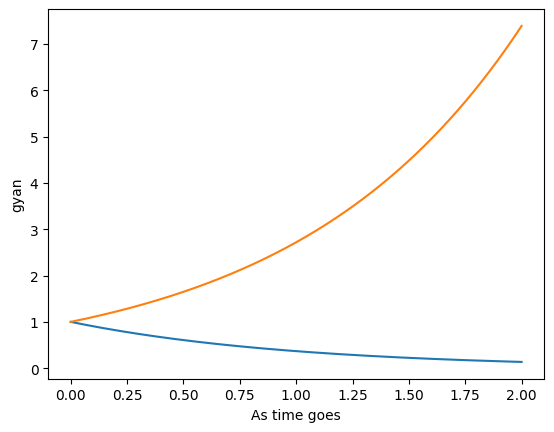

<Figure size 640x480 with 0 Axes>

In [97]:
import matplotlib.pyplot as plt
plt.plot(x,y1,label = 'gyan')
plt.plot(x,y2,label = 'murkho')
plt.xlabel('As time goes')
plt.ylabel('gyan')
plt.show()
plt.savefig('brainless_maniac.png')

In [98]:
X[:,:,0]

array([[-3.14159265, -3.14159265, -3.14159265, ..., -3.14159265,
        -3.14159265, -3.14159265],
       [-3.09942362, -3.09942362, -3.09942362, ..., -3.09942362,
        -3.09942362, -3.09942362],
       [-3.0572546 , -3.0572546 , -3.0572546 , ..., -3.0572546 ,
        -3.0572546 , -3.0572546 ],
       ...,
       [ 3.0572546 ,  3.0572546 ,  3.0572546 , ...,  3.0572546 ,
         3.0572546 ,  3.0572546 ],
       [ 3.09942362,  3.09942362,  3.09942362, ...,  3.09942362,
         3.09942362,  3.09942362],
       [ 3.14159265,  3.14159265,  3.14159265, ...,  3.14159265,
         3.14159265,  3.14159265]])

In [124]:
from pyDOE import lhs
np.sum(lhs(3,100)[0,:])

2.1458263296375817

In [125]:
lhs(3,100)

array([[7.96983681e-01, 2.26238052e-01, 4.06276072e-01],
       [8.98828959e-01, 1.78195960e-01, 5.00069553e-01],
       [4.86333177e-01, 7.12264380e-01, 3.65479320e-01],
       [9.77126945e-01, 6.66250069e-01, 3.87885403e-01],
       [9.48345195e-01, 4.10480392e-01, 6.54742344e-01],
       [7.60334236e-01, 7.35441689e-01, 6.05756649e-01],
       [5.14934957e-01, 1.83926587e-01, 9.33726276e-01],
       [8.40773616e-01, 1.27647907e-01, 1.33018511e-01],
       [7.32056665e-01, 2.23451182e-02, 1.87812562e-01],
       [6.54239101e-01, 4.66723491e-01, 6.62393630e-01],
       [7.74910796e-02, 9.16635088e-02, 5.56198772e-01],
       [2.72052002e-02, 6.86435621e-01, 2.66108802e-01],
       [2.14649893e-01, 5.25839721e-01, 2.98907657e-02],
       [4.16118008e-01, 2.31811516e-01, 8.15490801e-01],
       [8.88691559e-03, 3.93801386e-01, 7.09983814e-01],
       [4.22674753e-01, 9.12407793e-01, 2.48573179e-01],
       [6.21053063e-01, 9.46285736e-01, 4.24842100e-01],
       [3.29881097e-01, 6.45634

In [126]:
np.sum(lhs(3,100)[0,:])

2.2524228280705554